# Data Analysis on Marketing

https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set

Data from UC Irvine Machine Learning Repository of a Portuguese bank that used its own contact-center to do directed marketing campaigns. 
The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 41188 customers,
which aim to promote term deposits among existing customers. </p>

This project strives to create a model to predit the outcomes of each targeted phone calls, aiming to improve the productivity of the call center.

##### Input variables:
**- Client data: cust_v2.xlsx** <br>
1 - cust_id : customer id<br>
2 - age (numeric)<br>
3 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed')<br>
4 - marital : marital status (categorical: 'divorced','married','single')<br>
5 - education: highest education complete (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree')<br>
6 - default: has credit in default? (categorical: 'no','yes')<br>
7 - mortgage: has housing loan? (categorical: 'no','yes')<br>
8 - loan: has personal loan? (categorical: 'no','yes')<br>
<br>
**- Historical campaign results: contact_v2.csv**<br>
9 - contact_type: contact communication type (categorical: 'cellular','telephone')<br> 
10 - date: last contact date<br>
11 - duration: last contact duration, in seconds (numeric)<br>
12 - contact_num: number of contacts performed during campaign for this client (numeric, includes last contact)<br>
13 - p_days: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - p_outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
##### Output variables:
15 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Library used


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Load dataset

In [4]:
cust = pd.read_excel('/workspaces/MARKETING_CAMPAIGN_ANALYSIS/cust_v2.xlsx')
cust

,cust_id,age,job,marital,education,default,mortgage,loan
0,78339,48.0,blue-collar,married,basic.6y,no,yes,no
1,94962,68.0,retired,married,university.degree,no,yes,no
2,71110,45.0,services,divorced,high.school,unknown,yes,no
3,97004,28.0,blue-collar,single,unknown,no,no,no
4,11598,37.0,blue-collar,married,professional.course,no,no,no
...,...,...,...,...,...,...,...,...
42183,56044,32.0,blue-collar,single,basic.9y,no,yes,no
42184,24556,42.0,blue-collar,married,high.school,no,no,yes
42185,15097,54.0,technician,married,high.school,no,yes,no
42186,2365,37.0,technician,married,university.degree,no,no,no


In [5]:
contact = pd.read_csv('/workspaces/MARKETING_CAMPAIGN_ANALYSIS/contact_v2.csv')
contact

,cust_id,contact_type,duration,contact_num,p_days,p_outcome,y,date
0,44715,cellular,108.0,2.0,999,nonexistent,no,02/08/2008
1,62194,telephone,422.0,5.0,999,nonexistent,no,03/06/2008
2,25436,cellular,107.0,13.0,999,nonexistent,no,16/07/2008
3,39633,cellular,311.0,1.0,999,nonexistent,no,15/07/2008
4,92803,cellular,51.0,1.0,999,nonexistent,no,09/11/2008
...,...,...,...,...,...,...,...,...
41183,56044,cellular,282.0,1.0,999,nonexistent,yes,30/08/2009
41184,24556,telephone,1297.0,3.0,999,nonexistent,yes,11/05/2008
41185,15097,cellular,178.0,5.0,999,nonexistent,no,26/04/2009
41186,2365,cellular,219.0,2.0,999,nonexistent,no,14/05/2009


# Data Overview


### Client Data: Cust

In [6]:
print(cust.shape)

(42188, 8)


In [7]:
print(cust.columns)

Index(['cust_id', 'age', 'job', 'marital', 'education', 'default', 'mortgage',
       'loan'],
      dtype='object')


In [8]:
cust.dtypes

cust_id        int64
age          float64
job           object
marital       object
education     object
default       object
mortgage      object
loan          object
dtype: object

In [9]:
cust.describe()

,cust_id,age
count,42188.000000,42153.000000
mean,51184.983668,40.079805
std,29730.013547,10.388379
min,2.000000,17.000000
25%,25483.250000,32.000000
50%,50966.500000,38.000000
75%,76751.500000,47.000000
max,109988.000000,98.000000


### Historical campaign results: Contact

In [10]:
print(contact.shape)

(41188, 8)


In [11]:
print(contact.columns)

Index(['cust_id', 'contact_type', 'duration', 'contact_num', 'p_days',
       'p_outcome', 'y', 'date'],
      dtype='object')


In [12]:
contact.dtypes

cust_id           int64
contact_type     object
duration        float64
contact_num     float64
p_days            int64
p_outcome        object
y                object
date             object
dtype: object

In [13]:
contact.describe()

,cust_id,duration,contact_num,p_days
count,41188.000000,41178.000000,41179.000000,41188.000000
mean,49882.195955,258.289475,2.567717,962.475454
std,28870.956270,259.285235,2.770260,186.910907
min,2.000000,0.000000,1.000000,0.000000
25%,24897.750000,102.000000,1.000000,999.000000
50%,49676.500000,180.000000,2.000000,999.000000
75%,74895.500000,319.000000,3.000000,999.000000
max,99999.000000,4918.000000,56.000000,999.000000


#### Checking all job titles

In [14]:
cust.job.unique()

array(['blue-collar', 'retired', 'services', 'admin.', 'technician',
       'management', 'unknown', 'entrepreneur', 'student', 'housemaid',
       'self-employed', 'unemployed', nan], dtype=object)

In [15]:
cust.job.value_counts()

job
admin.           10620
blue-collar       9513
technician        6883
services          4090
management        3006
retired           1747
entrepreneur      1492
self-employed     1446
housemaid         1094
unemployed        1032
student            884
unknown            349
Name: count, dtype: int64

### Joining Data

In [16]:
cmpn = pd.merge(left=cust,right=contact,how="inner",left_on="cust_id",right_on="cust_id")
cmpn

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,date
0,78339,48.0,blue-collar,married,basic.6y,no,yes,no,cellular,862.0,3.0,999,nonexistent,yes,10/05/2009
1,94962,68.0,retired,married,university.degree,no,yes,no,cellular,546.0,2.0,999,failure,yes,25/07/2010
2,71110,45.0,services,divorced,high.school,unknown,yes,no,telephone,101.0,2.0,999,nonexistent,no,01/05/2008
3,97004,28.0,blue-collar,single,unknown,no,no,no,cellular,437.0,1.0,999,nonexistent,no,18/07/2008
4,11598,37.0,blue-collar,married,professional.course,no,no,no,cellular,188.0,1.0,999,nonexistent,no,05/04/2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56044,32.0,blue-collar,single,basic.9y,no,yes,no,cellular,282.0,1.0,999,nonexistent,yes,30/08/2009
41184,24556,42.0,blue-collar,married,high.school,no,no,yes,telephone,1297.0,3.0,999,nonexistent,yes,11/05/2008
41185,15097,54.0,technician,married,high.school,no,yes,no,cellular,178.0,5.0,999,nonexistent,no,26/04/2009
41186,2365,37.0,technician,married,university.degree,no,no,no,cellular,219.0,2.0,999,nonexistent,no,14/05/2009


#### Modifying colums

In [17]:
cmpn['duration_mins'] = cmpn.duration / 60
col = ['cust_id','age','job','marital','education','default','mortgage','loan',
       'contact_type','date','duration_mins','contact_num','p_days','p_outcome','y']
cmpn = cmpn[col]
cmpn

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,date,duration_mins,contact_num,p_days,p_outcome,y
0,78339,48.0,blue-collar,married,basic.6y,no,yes,no,cellular,10/05/2009,14.366667,3.0,999,nonexistent,yes
1,94962,68.0,retired,married,university.degree,no,yes,no,cellular,25/07/2010,9.100000,2.0,999,failure,yes
2,71110,45.0,services,divorced,high.school,unknown,yes,no,telephone,01/05/2008,1.683333,2.0,999,nonexistent,no
3,97004,28.0,blue-collar,single,unknown,no,no,no,cellular,18/07/2008,7.283333,1.0,999,nonexistent,no
4,11598,37.0,blue-collar,married,professional.course,no,no,no,cellular,05/04/2009,3.133333,1.0,999,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56044,32.0,blue-collar,single,basic.9y,no,yes,no,cellular,30/08/2009,4.700000,1.0,999,nonexistent,yes
41184,24556,42.0,blue-collar,married,high.school,no,no,yes,telephone,11/05/2008,21.616667,3.0,999,nonexistent,yes
41185,15097,54.0,technician,married,high.school,no,yes,no,cellular,26/04/2009,2.966667,5.0,999,nonexistent,no
41186,2365,37.0,technician,married,university.degree,no,no,no,cellular,14/05/2009,3.650000,2.0,999,nonexistent,no


### Data Preperation

In [18]:
#create a copy of cmpn
df = cmpn.copy()
df

# Change the outcome to binary
df.loc[df.y=='yes',"y_int"] = 1
df.loc[df.y=='no',"y_int"] = 0

df = df.drop(columns=['y','date'])
df

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration_mins,contact_num,p_days,p_outcome,y_int
0,78339,48.0,blue-collar,married,basic.6y,no,yes,no,cellular,14.366667,3.0,999,nonexistent,1.0
1,94962,68.0,retired,married,university.degree,no,yes,no,cellular,9.100000,2.0,999,failure,1.0
2,71110,45.0,services,divorced,high.school,unknown,yes,no,telephone,1.683333,2.0,999,nonexistent,0.0
3,97004,28.0,blue-collar,single,unknown,no,no,no,cellular,7.283333,1.0,999,nonexistent,0.0
4,11598,37.0,blue-collar,married,professional.course,no,no,no,cellular,3.133333,1.0,999,nonexistent,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56044,32.0,blue-collar,single,basic.9y,no,yes,no,cellular,4.700000,1.0,999,nonexistent,1.0
41184,24556,42.0,blue-collar,married,high.school,no,no,yes,telephone,21.616667,3.0,999,nonexistent,1.0
41185,15097,54.0,technician,married,high.school,no,yes,no,cellular,2.966667,5.0,999,nonexistent,0.0
41186,2365,37.0,technician,married,university.degree,no,no,no,cellular,3.650000,2.0,999,nonexistent,0.0


#### Seperating Categoric and Numeric variables

In [19]:
#Storing Cateforic and Numeric variables in lists
var_char = cmpn.dtypes[cmpn.dtypes == 'object'].index.tolist()
var_num = cmpn.dtypes[cmpn.dtypes != 'object'].index.tolist()
var_key = ['cust_id','date']
    
for i in var_key:
    if (i in var_num):
        var_num.remove(i)
    if (i in var_char):
        var_char.remove(i)
        
print(var_char)
print(var_num)

['job', 'marital', 'education', 'default', 'mortgage', 'loan', 'contact_type', 'p_outcome', 'y']
['age', 'duration_mins', 'contact_num', 'p_days']


In [20]:
#Storing Categoric and Numeric and Key in dataframe to prepare for model
cmpn_char = cmpn[var_char]
cmpn_num = cmpn[var_num]
cmpn_key = cmpn[var_key]

#### Checking Nulls and Duplicates

##### Duplicate Check

There are no duplicate entries present in this dataset

In [21]:
print(cmpn.shape)
cmpn=cmpn.drop_duplicates()
print(cmpn.shape)

(41188, 15)
(41188, 15)


##### Null Check

Based on the analysis, it's determined that the proportion of missing values within each variable is less than 1%. Additionally, the total number of rows containing null values comprises only 0.54% of the dataset. Given that this percentage is significantly lower than the 5% threshold, it is deemed acceptable to remove these rows from the dataset.

In [22]:
#Calculating the missing rate
missing_count = df.isna().sum()
missing_rate = (missing_count / df.shape[0])*100

#Concatenate the missing rate into a dataframe
missing_summary = pd.concat([missing_count,missing_rate],axis=1).reset_index()
missing_summary.columns = ["variable","missing count","missing rate %"]
missing_summary

,variable,missing count,missing rate %
0,cust_id,0,0.000000
1,age,35,0.084976
2,job,32,0.077693
3,marital,17,0.041274
4,education,42,0.101971
5,default,0,0.000000
6,mortgage,0,0.000000
7,loan,49,0.118967
8,contact_type,15,0.036418
9,duration_mins,10,0.024279


In [23]:
#Checking total percentage of Null values account for in the data set
check_remove_null = df.copy()
(1- (len(check_remove_null.dropna()) / len(cmpn)))*100

0.5389919393998244

In [24]:
#Create new dataset with no Null values
null_removed = df.copy().dropna()

#Check if it contains Nulls
null_removed.isna().sum()

cust_id          0
age              0
job              0
marital          0
education        0
default          0
mortgage         0
loan             0
contact_type     0
duration_mins    0
contact_num      0
p_days           0
p_outcome        0
y_int            0
dtype: int64

### Analysis

In [25]:
null_removed.groupby('job').duration_mins.mean()

job
admin.           4.236509
blue-collar      4.403915
entrepreneur     4.386205
housemaid        4.174676
management       4.283093
retired          4.550772
self-employed    4.407957
services         4.311155
student          4.705236
technician       4.173363
unemployed       4.129382
unknown          3.994596
Name: duration_mins, dtype: float64

In [26]:
null_removed[['age','duration_mins']].describe()

,age,duration_mins
count,40966.000000,40966.000000
mean,40.018113,4.302348
std,10.417779,4.316419
min,17.000000,0.000000
25%,32.000000,1.700000
50%,38.000000,3.000000
75%,47.000000,5.316667
max,98.000000,81.966667


#### Pivot Table

In [27]:
# Pivot table with mean aggregation
a = null_removed.pivot_table(values='duration_mins', index='job', columns='marital', aggfunc='mean',margins=False)
a

marital,divorced,married,single,unknown
job,,,,
admin.,4.239974,4.240674,4.224550,5.658333
blue-collar,4.541598,4.359708,4.499697,5.785714
entrepreneur,3.905932,4.471684,4.327805,6.366667
housemaid,4.198333,4.148919,4.365266,1.972222
management,4.141591,4.307586,4.284970,2.650000
retired,4.282707,4.604803,4.657428,7.490000
self-employed,4.875940,4.365501,4.293369,8.250000
services,4.315723,4.195720,4.542348,4.000000
student,5.883333,3.771951,4.741646,2.583333


#### Response rate for each job values

Based on our analysis, we have observed that the category with the highest response rate is "students", while the category with the lowest response rate is "blue-collar". The average response rate across all categories is 11.26%. Notably, occupations such as "student", "retired", "unemployed", and "admin" have response rates above the average, suggesting that targeting campaigns towards these occupations may yield better outcomes.

In [28]:
#Resonse rate for each job in percentage (%)
(null_removed.groupby('job')['y_int'].mean()*100).sort_values(ascending=False)

job
student          31.300345
retired          25.205158
unemployed       14.186508
admin.           12.992278
unknown          11.212121
management       11.145511
technician       10.814837
self-employed    10.522599
housemaid        10.066477
entrepreneur      8.581315
services          8.141593
blue-collar       6.877445
Name: y_int, dtype: float64

In [29]:
null_removed.y_int.mean()*100

11.258116486842749

### Model Fitting

#### Categorical variable processing: One-hot encoding

In [30]:
null_removed_dummies = pd.get_dummies(null_removed)
null_removed_dummies

,cust_id,age,duration_mins,contact_num,p_days,y_int,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,mortgage_unknown,mortgage_yes,loan_no,loan_unknown,loan_yes,contact_type_cellular,contact_type_telephone,p_outcome_failure,p_outcome_nonexistent,p_outcome_success
0,78339,48.0,14.366667,3.0,999,1.0,False,True,False,False,...,False,True,True,False,False,True,False,False,True,False
1,94962,68.0,9.100000,2.0,999,1.0,False,False,False,False,...,False,True,True,False,False,True,False,True,False,False
2,71110,45.0,1.683333,2.0,999,0.0,False,False,False,False,...,False,True,True,False,False,False,True,False,True,False
3,97004,28.0,7.283333,1.0,999,0.0,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
4,11598,37.0,3.133333,1.0,999,0.0,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56044,32.0,4.700000,1.0,999,1.0,False,True,False,False,...,False,True,True,False,False,True,False,False,True,False
41184,24556,42.0,21.616667,3.0,999,1.0,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
41185,15097,54.0,2.966667,5.0,999,0.0,False,False,False,False,...,False,True,True,False,False,True,False,False,True,False
41186,2365,37.0,3.650000,2.0,999,0.0,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


#### Splitting data into predictors and outcomes

In [31]:
#Getting all  variables in null_removed_dummies
print(null_removed_dummies.columns)

Index(['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days', 'y_int',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'mortgage_no', 'mortgage_unknown', 'mortgage_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_type_cellular',
       'contact_type_telephone', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success'],
      dtype='object')


In [32]:
#Setting predictors
X = null_removed_dummies[['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'mortgage_no', 'mortgage_unknown', 'mortgage_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_type_cellular',
       'contact_type_telephone', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success']]
#Setting y_int as outcome
y = null_removed_dummies.y_int

#### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#### Logistics Regression

Logistic regression is ideal for scenarios where we want to predict binary outcomes("Yes"/"No"). Since it is designed specifically for binary classification tasks.

Assumptions that are made:
- Binary Outcome
- Independence of Observations
- Linearity of Log Odds
- Little to none Multicollinearity
- Large Sample Size

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the logistic regression model
log_model = LogisticRegression()
log_clf=log_model.fit(X_train, y_train)

# Predicted classes
y_pred=log_clf.predict(X_test)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Confusion Matrix

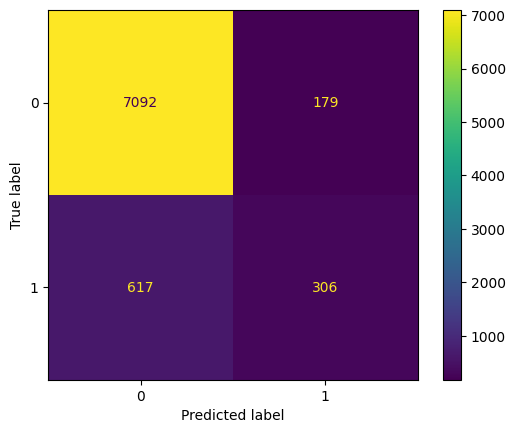

Precision:  0.6309278350515464
Sensitivity_recall:  0.3315276273022752
Logistic Regression Accuracy:  0.902855748108372
F1_score:  0.4346590909090909


In [35]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

#### Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=2023)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)

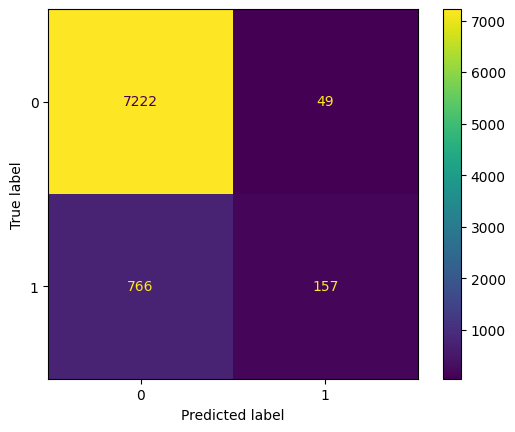

Precision:  0.7621359223300971
Sensitivity_recall:  0.17009750812567714
Accuracy: 0.9005369782767879
F1_score:  0.27812223206377323


In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

### Imputing Variables

#### Impute Categorical variables

In [38]:
for col in cmpn_char.columns:
    cmpn_char.loc[cmpn_char[col].isna(), col] = "unknown"

In [39]:
cmpn_char.isna().sum()

job             0
marital         0
education       0
default         0
mortgage        0
loan            0
contact_type    0
p_outcome       0
y               0
dtype: int64

#### Impute Numeric variables

In [40]:
for i in cmpn_num.columns:
    cmpn_num.loc[cmpn_num[i].isna(), i] = cmpn_num[i].median()

In [41]:
cmpn_num.isna().sum()

age              0
duration_mins    0
contact_num      0
p_days           0
dtype: int64

#### Concatenate the imputed variables

In [42]:
cmpn_impute = pd.concat([cmpn_key,cmpn_num,cmpn_char], axis=1)
print(cmpn_impute.isna().sum())

cust_id          0
date             0
age              0
duration_mins    0
contact_num      0
p_days           0
job              0
marital          0
education        0
default          0
mortgage         0
loan             0
contact_type     0
p_outcome        0
y                0
dtype: int64


## Imputed data model

The inclusion of imputed values for both categorical and numeric variables, utilizing mean imputation, has demonstrated a notable enhancement in prediction accuracy. By imputing missing values with the mean, we successfully mitigated the impact of incomplete data on our predictive model. This approach not only helped maintain the overall distribution of the dataset but also contributed to minimizing bias introduced by excluding incomplete observations. However, it's essential to acknowledge that mean imputation assumes that missing data are completely at random (MCAR), a critical assumption that should be carefully validated for our dataset. While this strategy led to an improvement in prediction performance, further exploration of alternative imputation methods and robustness checks will be beneficial to ensure the reliability and generalizability of our results.

In [43]:
#create a copy of cmpn, so it won't mess up the original dataset
df = cmpn_impute.copy()
df
# Change the outcome to binary, i.e. 0 and 1
df.loc[df.y=='yes',"y_int"] = 1
df.loc[df.y=='no',"y_int"] = 0

df = df.drop(columns=['y','date'])

### Getting Dummies

In [44]:
df2 = pd.get_dummies(df)

In [45]:
#Setting predictors
X = df2[['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'mortgage_no', 'mortgage_unknown', 'mortgage_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_type_cellular',
       'contact_type_telephone', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success']]
#Setting y_int as outcome
y = df2.y_int

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=10, random_state=2023)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.902282107307599


#### Confusion Matrix

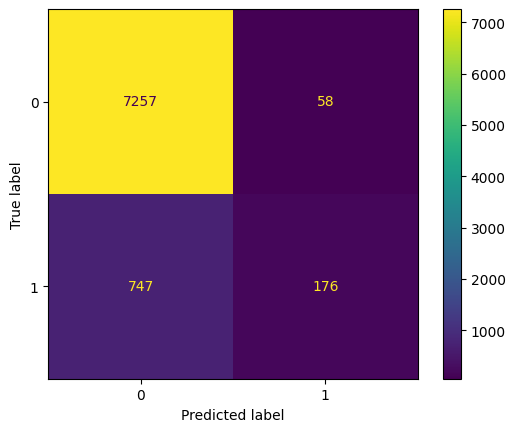

Precision:  0.7521367521367521
Sensitivity_recall:  0.19068255687973998
Logistic Regression Accuracy:  0.902282107307599
F1_score:  0.30423509075194466


In [48]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

### Logistics Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the logistic regression model
log_model = LogisticRegression()
log_clf=log_model.fit(X_train, y_train)

# Predicted classes
y_pred=log_clf.predict(X_test)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Confusion Matrix

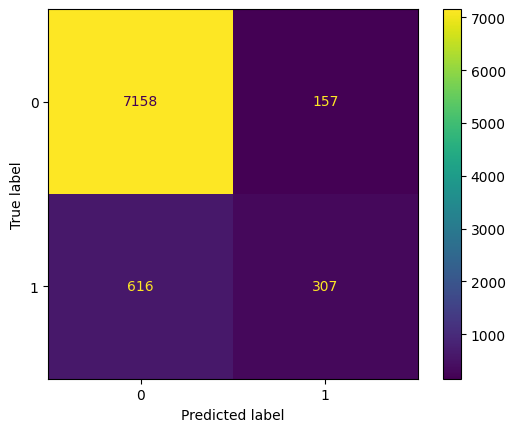

Precision:  0.6616379310344828
Sensitivity_recall:  0.3326110509209101
Logistic Regression Accuracy:  0.9061665452779801
F1_score:  0.4426820475847152


In [50]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

## Feature Engineering

### Cheking Multicolinearity

#### Categorical Variables

In [51]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage:
# Assuming df is your DataFrame with categorical variables
categorical_columns = cmpn_char.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(cmpn_char[col1], cmpn_char[col2])

print("Cramer's V matrix:")
print(cramers_v_matrix)

Cramer's V matrix:
                   job   marital education   default  mortgage      loan  \
job                1.0  0.182515  0.358729  0.151628  0.010725  0.009716   
marital       0.182515       1.0  0.115709  0.095241  0.007461       0.0   
education     0.358729  0.115709       1.0  0.170049  0.013475       0.0   
default       0.151628  0.095241  0.170049       1.0  0.010573       0.0   
mortgage      0.010725  0.007461  0.013475  0.010573       1.0  0.691591   
loan          0.009716       0.0       0.0       0.0  0.691591       1.0   
contact_type  0.090402  0.050755  0.087211  0.095723  0.059714  0.015922   
p_outcome     0.081242  0.030041  0.033959  0.076418  0.016312       0.0   
y              0.15165  0.053787  0.067365  0.099111  0.009458       0.0   

             contact_type p_outcome         y  
job              0.090402  0.081242   0.15165  
marital          0.050755  0.030041  0.053787  
education        0.087211  0.033959  0.067365  
default          0.095723  0

In [52]:
# Threshold for Cramer's V value
threshold = 0.3

# Filter Cramer's V matrix for values greater than the threshold
cramers_v_greater_than_03 = cramers_v_matrix[cramers_v_matrix > threshold]

# Drop diagonal elements (where the variable is compared to itself)
np.fill_diagonal(cramers_v_greater_than_03.values, np.nan)

# Print values greater than 0.3
print("Pairs of variables with Cramer's V > 0.3:")
print(cramers_v_greater_than_03.stack().reset_index().rename(columns={0: "Cramer's V"}))

Pairs of variables with Cramer's V > 0.3:
     level_0    level_1 Cramer's V
0        job  education   0.358729
1  education        job   0.358729
2   mortgage       loan   0.691591
3       loan   mortgage   0.691591
4  p_outcome          y   0.320414
5          y  p_outcome   0.320414


#### Numeric Variables

In [53]:
corr_matrix = cmpn_num.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
to_drop

[]

In our modeling process, we've decided to exclude the "default" feature as it's unrelated to the likelihood of individuals subscribing to term deposits, our primary focus. Additionally, we've identified moderate multicollinearity between the "Job" and "Education" features, as well as between "Mortgage" and "Loan". To maintain model robustness and interpretability, we've opted to remove these correlated features from our analysis.







In [54]:
#create a copy of cmpn, so it won't mess up the original dataset
df = cmpn_impute.copy()
df
# Change the outcome to binary, i.e. 0 and 1
df.loc[df.y=='yes',"y_int"] = 1
df.loc[df.y=='no',"y_int"] = 0

df = df.drop(columns=['y', 'date','default','mortgage','loan'])

In [55]:
df2 = pd.get_dummies(df)
print(df2.columns)

Index(['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days', 'y_int',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_type_cellular', 'contact_type_telephone',
       'contact_type_unknown', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success', 'p_outcome_unknown'],
      dtype='object')


In [56]:
#Setting predictors
X = df2[['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days', 
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_type_cellular', 'contact_type_telephone',
       'contact_type_unknown', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success', 'p_outcome_unknown']]

#Setting y_int as outcome
y = df2.y_int

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the logistic regression model
log_model = LogisticRegression()
log_clf=log_model.fit(X_train, y_train)

# Predicted classes
y_pred=log_clf.predict(X_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


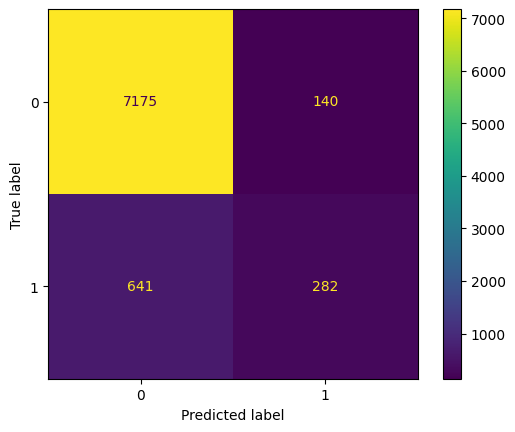

Precision:  0.6682464454976303
Sensitivity_recall:  0.3055254604550379
Logistic Regression Accuracy:  0.9051954357853847
F1_score:  0.41933085501858736


In [59]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

## Regularization Ridge regression

In [60]:
#Setting y_int as outcome
y = df2.y_int

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the logistic regression model
penalty = 'l2'
C = 0.1
log_model = LogisticRegression(penalty=penalty, C=C)
log_clf=log_model.fit(X_train, y_train)

# Predicted classes
y_pred=log_clf.predict(X_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


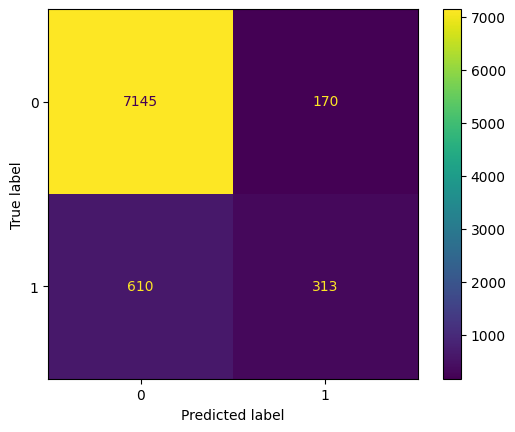

Precision:  0.6480331262939959
Sensitivity_recall:  0.3391115926327194
Logistic Regression Accuracy:  0.9053168244719592
F1_score:  0.44523470839260315


In [62]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

## Random Forest

Dataset has imbalanced outcomes, meaning one class significantly outweighs the other(s), the Random Forest model may struggle to learn from the minority class. Techniques such as class weighting, resampling, or using alternative evaluation metrics can help address imbalanced data issues.

In [63]:
#Setting predictors
X = df2[['cust_id', 'age', 'duration_mins', 'contact_num', 'p_days',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_type_cellular', 'contact_type_telephone',
       'contact_type_unknown', 'p_outcome_failure', 'p_outcome_nonexistent',
       'p_outcome_success', 'p_outcome_unknown']]

#Setting y_int as outcome
y = df2.y_int

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### Validation Cruve

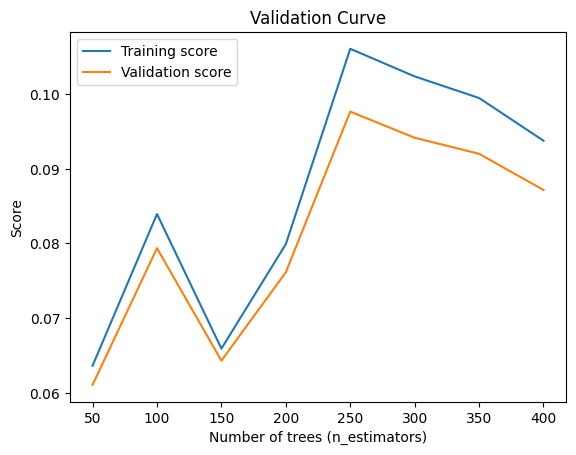

In [68]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

param_range = np.arange(50, 401, 50)  # Define a range of values for n_estimators

train_scores, valid_scores = validation_curve(RandomForestClassifier(max_depth=3, random_state=2023),
                                              X_train, y_train,
                                              param_name='n_estimators',
                                              param_range=param_range,
                                              cv=5,
                                              scoring='recall')

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

best_n_estimators = param_range[np.argmax(np.mean(valid_scores, axis=1))]

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=250, random_state=2023)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a random forest classifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=117)

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='recall')

# Fit the model on the entire training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.18707941 0.15208614 0.17900404 0.15591398 0.15591398]
Mean CV accuracy: 0.1659995079523582


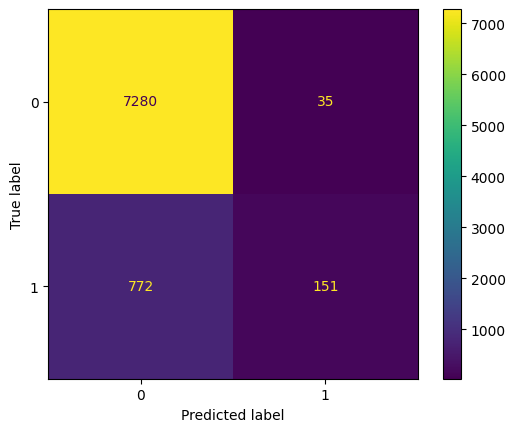

Precision:  0.8118279569892473
Sensitivity_recall:  0.1635969664138678
Logistic Regression Accuracy:  0.9020393299344501
F1_score:  0.2723174030658251


In [71]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

### Learning Curve

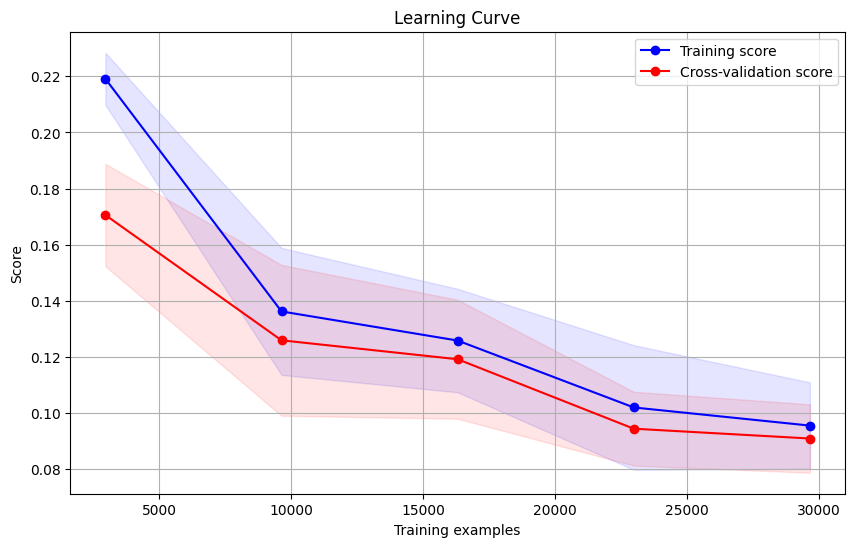

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring=None):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="r", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example usage:
plot_learning_curve(RandomForestClassifier(max_depth=3, random_state=2023), X_train, y_train, cv=10, scoring='recall')

### Fixing imbalance

In [75]:
# Calculate class frequencies
class_counts = np.bincount(y_train)
total_samples = len(y_train)

# Calculate class weights
class_weights = {class_label: total_samples / count for class_label, count in enumerate(class_counts)}

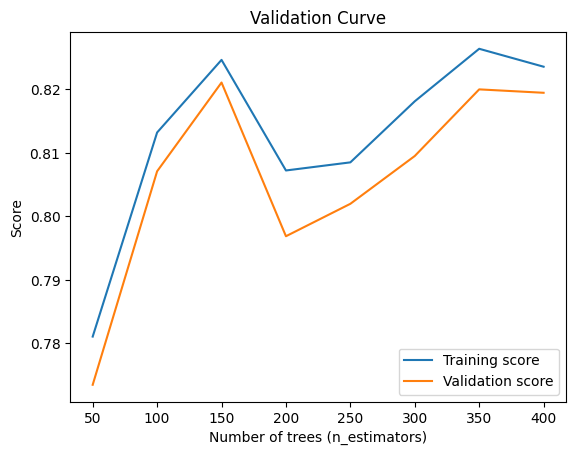

In [82]:
param_range = np.arange(50, 401, 50)  # Define a range of values for n_estimators

train_scores, valid_scores = validation_curve(RandomForestClassifier(max_depth=3,class_weight=class_weights, random_state=2023),
                                              X_train, y_train,
                                              param_name='n_estimators',
                                              param_range=param_range,
                                              cv=5,
                                              scoring='recall')

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

best_n_estimators = param_range[np.argmax(np.mean(valid_scores, axis=1))]

In [85]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=150, class_weight=class_weights, random_state=2023)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)

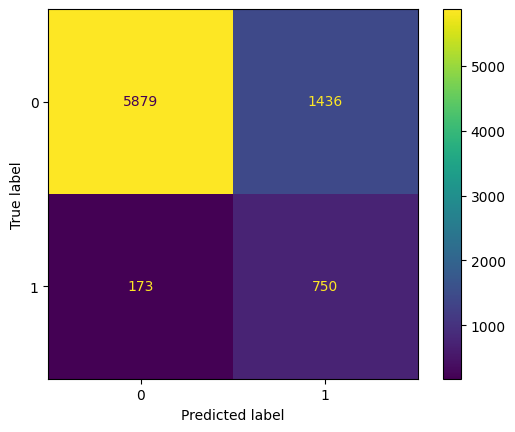

Precision:  0.34309240622140896
Sensitivity_recall:  0.8125677139761647
Logistic Regression Accuracy:  0.8046856033017723
F1_score:  0.48247024766806046


In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print('Precision: ' , metrics.precision_score(y_test, y_pred))
print('Sensitivity_recall: ', metrics.recall_score(y_test, y_pred))
print("Logistic Regression Accuracy: ", np.mean(y_pred == y_test))
print('F1_score: ' , metrics.f1_score(y_test, y_pred))

- A small gap indicates low variance (i.e., the model generalizes well to unseen data).
- Training score is not significantly higher than the validation score, meaning not overfitting the data.

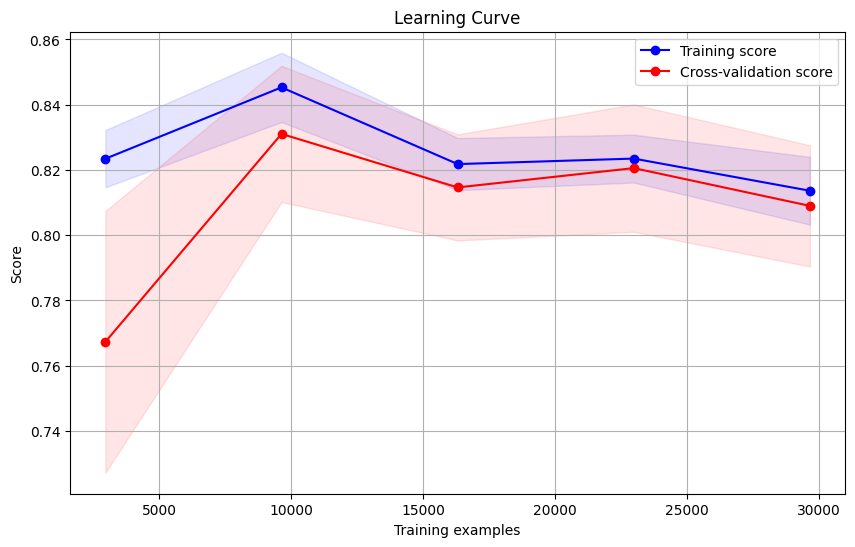

In [87]:
plot_learning_curve(RandomForestClassifier(max_depth=3, n_estimators=150, class_weight=class_weights, random_state=2023), X_train, y_train, cv=10, scoring='recall')